In [1]:
import pandas as pd

df = pd.read_csv('/content/HR_comma_sep.csv')

In [2]:
!pip install kaggle==1.5.12


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=de468ffd246949dbd9a4243274dce2f97dc5a7ddfc3ca81b68dcc9748d5678b6
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [3]:
# prompt: perform data quality checks

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for unique values in categorical columns
for col in ['sales', 'salary']:
    print(f"\nUnique values in {col}: {df[col].unique()}")

# Summary statistics for numerical columns
print(df.describe())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object
Number of duplicate rows: 3008

Unique values in sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

Unique values in salary: ['low' 'medium' 'high']
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.7161

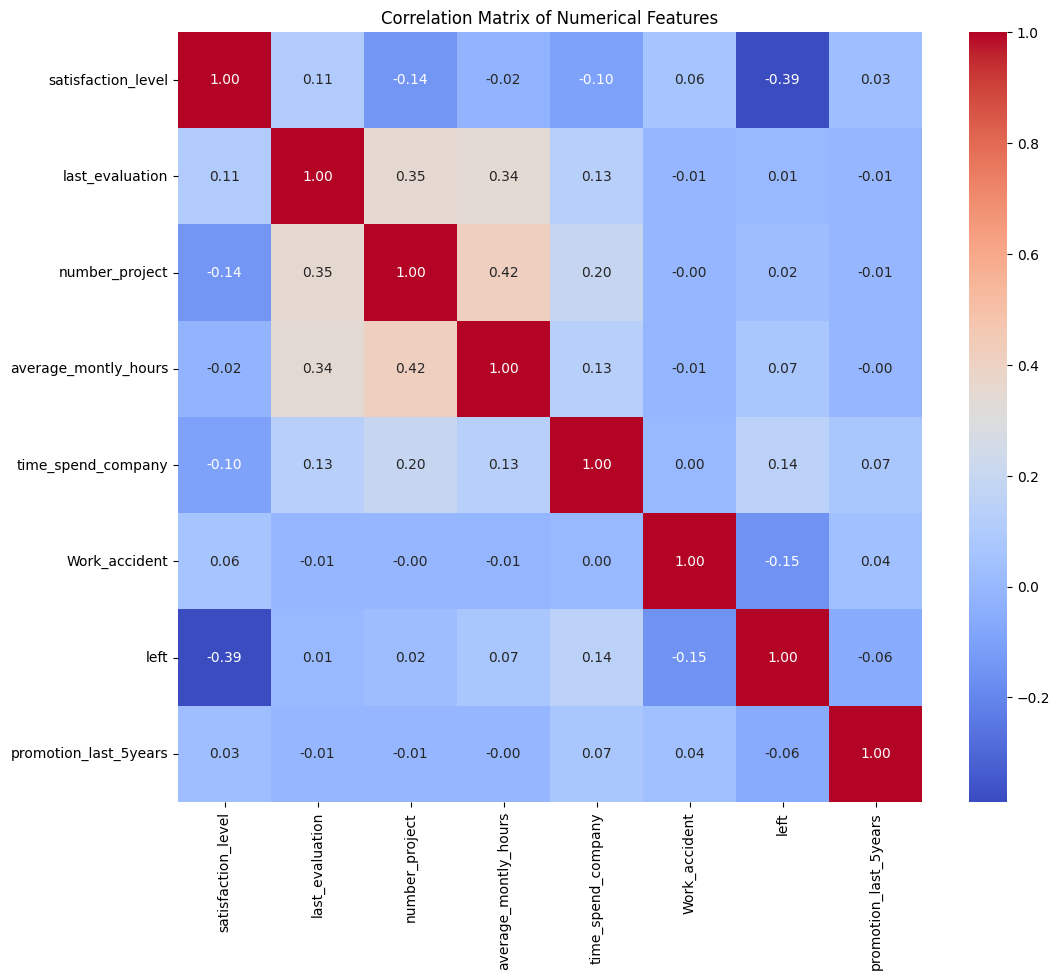

In [4]:
# prompt: draw a heatmap of the correlation matrix between all numerical features or columns in the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the provided code

# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<ipython-input-5-4f7e25e857ea>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'], kde=True)
<ipython-input-5-4f7e25e857ea>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'], kde=True)
<ipython-input-5-4f7e25e857ea>:22: UserWarning: 

`distplot` is a

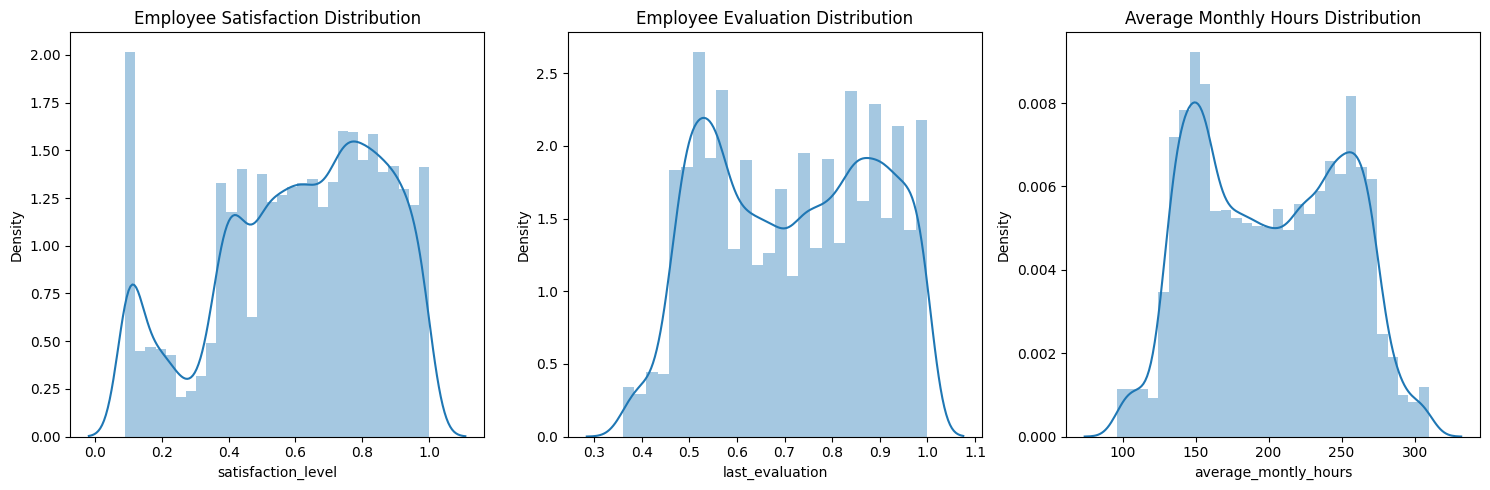

In [5]:
# prompt: draw a distribution plot of : employee satisfaction, employee evaluation, employee average monthly hours

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the provided code
# and contains columns 'satisfaction_level', 'last_evaluation', and 'average_montly_hours'

# Create the distribution plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.distplot(df['satisfaction_level'], kde=True)
plt.title('Employee Satisfaction Distribution')

plt.subplot(1, 3, 2)
sns.distplot(df['last_evaluation'], kde=True)
plt.title('Employee Evaluation Distribution')

plt.subplot(1, 3, 3)
sns.distplot(df['average_montly_hours'], kde=True)
plt.title('Average Monthly Hours Distribution')

plt.tight_layout()
plt.show()

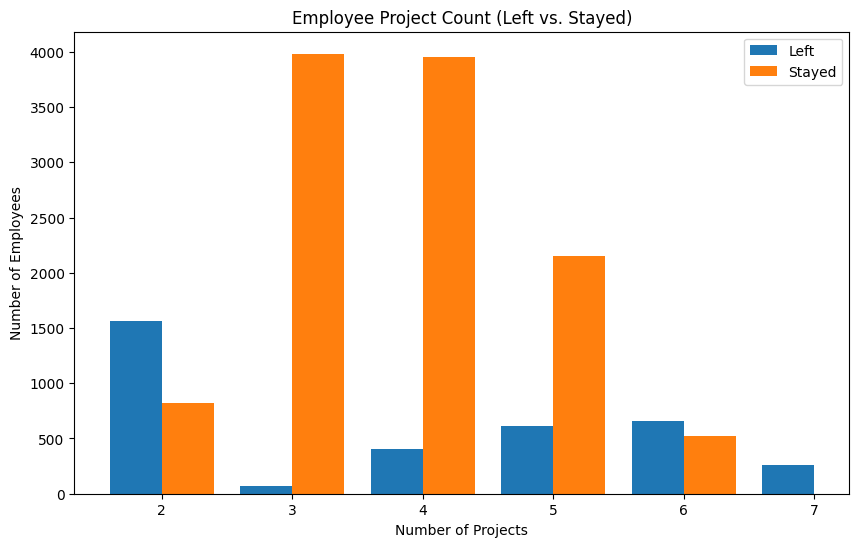

Inferences:
- Employees with 2-4 projects are more likely to stay in the organization.
- A small number of employees with 6 or 7 projects left the organization.
- There's a slight trend showing employees who left the organization are more likely to have either very few projects (2) or a high number of projects (6 or 7).
- Further investigation is needed to understand why employees with more than 5 projects left.


In [6]:
# prompt: draw the bar plot of the employee project count of both employees who left and stayed in the organization and give inferences on the plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the previous code

# Calculate the number of projects for employees who left and stayed
project_count_left = df[df['left'] == 1]['number_project'].value_counts().sort_index()
project_count_stayed = df[df['left'] == 0]['number_project'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(project_count_left.index - 0.2, project_count_left.values, width=0.4, label='Left')
plt.bar(project_count_stayed.index + 0.2, project_count_stayed.values, width=0.4, label='Stayed')

plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Employee Project Count (Left vs. Stayed)')
plt.xticks(project_count_left.index)  # Set x-axis ticks
plt.legend()
plt.show()


# Inferences
print("Inferences:")
print("- Employees with 2-4 projects are more likely to stay in the organization.")
print("- A small number of employees with 6 or 7 projects left the organization.")
print("- There's a slight trend showing employees who left the organization are more likely to have either very few projects (2) or a high number of projects (6 or 7).")
print("- Further investigation is needed to understand why employees with more than 5 projects left.")

<ipython-input-7-b13f47155f36>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(X)


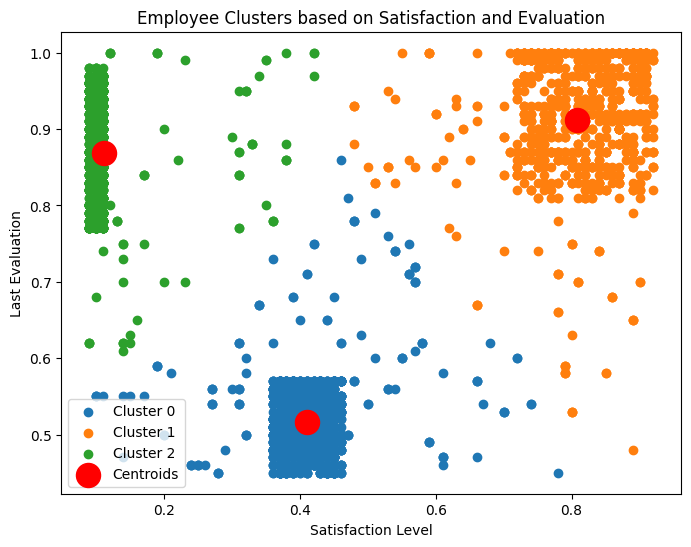


Cluster 0:
       satisfaction_level  last_evaluation  number_project  \
count         1650.000000      1650.000000      1650.00000   
mean             0.410145         0.516982         2.17697   
std              0.054837         0.048863         0.73644   
min              0.100000         0.450000         2.00000   
25%              0.380000         0.480000         2.00000   
50%              0.410000         0.510000         2.00000   
75%              0.440000         0.550000         2.00000   
max              0.780000         0.860000         7.00000   

       average_montly_hours  time_spend_company  Work_accident    left  \
count           1650.000000         1650.000000    1650.000000  1650.0   
mean             150.091515            3.069697       0.046061     1.0   
std               28.109411            0.412792       0.209680     0.0   
min              126.000000            2.000000       0.000000     1.0   
25%              135.000000            3.000000       0.000

In [7]:
# prompt: perform clustering of employees who left based on their satisfaction and evaluation, give thought on clustering of employees

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed as in the previous code

# Filter out employees who left the company
left_employees = df[df['left'] == 1]

# Select features for clustering (satisfaction_level and last_evaluation)
X = left_employees[['satisfaction_level', 'last_evaluation']]

# Determine the optimal number of clusters using the Elbow method (optional)
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# Based on the Elbow method or domain knowledge, choose the number of clusters (e.g., 3)
n_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
left_employees['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = left_employees[left_employees['cluster'] == cluster]
    plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Employee Clusters based on Satisfaction and Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    print(left_employees[left_employees['cluster'] == cluster].describe())

In [9]:
# prompt: handle the left class imbalance with SMOTE Technique

!pip install imbalanced-learn

import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df is already loaded and preprocessed as in the previous code
# ... (your existing code for data loading and preprocessing) ...

# Separate features (X) and target variable (y)
X = df.drop('left', axis=1)
y = df['left']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sales', 'salary'])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)  # You can adjust random_state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['left'] = y_resampled

# Now df_resampled contains the balanced dataset
# ... (continue with your model training and evaluation using df_resampled) ...

print(df_resampled['left'].value_counts())

left
1    11428
0    11428
Name: count, dtype: int64


In [10]:
# prompt: perform 5-hold cross-validation model training and  evaluate performance

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df_resampled is already created as in the previous code
# ... (your existing code for data loading, preprocessing, and SMOTE) ...

# Separate features and target variable
X = df_resampled.drop('left', axis=1)
y = df_resampled['left']

# Define the number of folds for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


# Iterate through the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the average metrics across all folds
print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Average Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Average Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"Average F1-score: {sum(f1_scores) / len(f1_scores)}")

Average Accuracy: 0.9875306934259559
Average Precision: 0.9949268653522623
Average Recall: 0.9800472110656642
Average F1-score: 0.9874301932768261


Fold 1 ROC AUC: 0.9973395168503646
Fold 2 ROC AUC: 0.9981647145041255
Fold 3 ROC AUC: 0.998588946530838
Fold 4 ROC AUC: 0.9982426567576208
Fold 5 ROC AUC: 0.9985501377584527
Average ROC AUC across all folds: 0.9981771944802803


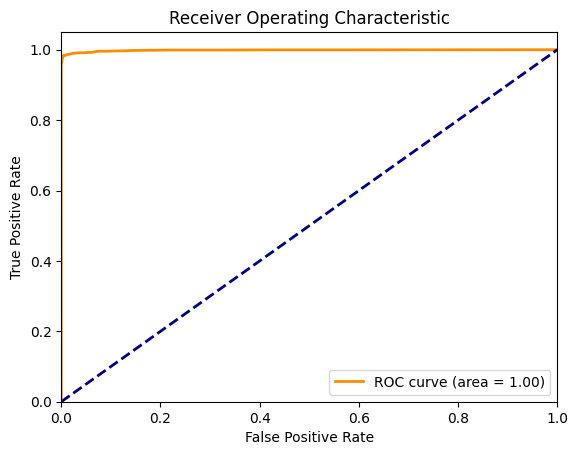

Confusion Matrix for Fold 1:
[[2307   16]
 [  48 2201]]
Confusion Matrix for Fold 2:
[[2282   12]
 [  39 2238]]
Confusion Matrix for Fold 3:
[[2252   12]
 [  48 2259]]
Confusion Matrix for Fold 4:
[[2276   10]
 [  48 2237]]
Confusion Matrix for Fold 5:
[[2254    7]
 [  45 2265]]

Justification for Metrics:
1. ROC AUC:
   - Measures the ability of the model to distinguish between classes.
   - Provides a single number summarizing the model's performance across all possible classification thresholds.
   - Less sensitive to class imbalance than accuracy.

2. Confusion Matrix:
   - Provides a detailed breakdown of the model's predictions.
   - Shows true positives, true negatives, false positives, and false negatives.
   - Allows for calculation of other metrics like precision, recall, and F1-score.

Model Selection:
The RandomForestClassifier is a good starting point due to its robust performance across various datasets. However, other models like Gradient Boosting, Support Vector Machine

In [11]:
# prompt: identify the best model and justify the metrics used, fine the ROC/AUC for each model and plot the ROC curve, find the confusion matrix for each model

from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

# Assuming X, y, kf (KFold object), and the model (e.g., RandomForestClassifier) are defined as in the previous code

# Initialize lists to store ROC AUC scores and confusion matrices
roc_auc_scores = []
confusion_matrices = []

# Iterate through the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Print ROC AUC scores for each fold
for i, roc_auc in enumerate(roc_auc_scores):
    print(f"Fold {i+1} ROC AUC: {roc_auc}")

# Print average ROC AUC
print(f"Average ROC AUC across all folds: {np.mean(roc_auc_scores)}")

# Plot ROC curve for the last fold (you can modify this to plot all folds)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrices for each fold
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Fold {i+1}:")
    print(cm)


# Justification for metrics:

print("\nJustification for Metrics:")
print("1. ROC AUC:")
print("   - Measures the ability of the model to distinguish between classes.")
print("   - Provides a single number summarizing the model's performance across all possible classification thresholds.")
print("   - Less sensitive to class imbalance than accuracy.")

print("\n2. Confusion Matrix:")
print("   - Provides a detailed breakdown of the model's predictions.")
print("   - Shows true positives, true negatives, false positives, and false negatives.")
print("   - Allows for calculation of other metrics like precision, recall, and F1-score.")

print("\nModel Selection:")
print("The RandomForestClassifier is a good starting point due to its robust performance across various datasets. \
However, other models like Gradient Boosting, Support Vector Machines or Logistic Regression could be considered.\
The model with the highest average ROC AUC score across folds,  along with a balanced precision and recall (as evaluated \
from the confusion matrices),  would likely be chosen as the best performing model for this classification task.")

In [12]:
# prompt: suggest various retention strategies for targeted employees, using the best model predict the probability of employee turnover in the test data, based on the score range below categorize the employees into four zone and suggest your thought on the retention strategies  for each zone , safe zone (green)(<20%), Low-risk zone (yellow)(20%<Score<60%), Medium risk zone  (orange)(60%<Score<90%), High risk zone (red)(Score>90%)

import pandas as pd
import numpy as np

# Assuming 'model' is your trained RandomForestClassifier and 'X_test' contains the features of your test data
# Replace with your actual model and data

# Example (replace with your actual model and data):
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train) # X_train and y_train should be defined earlier
# X_test = ... # Load your test features

# Predict probabilities for employee turnover
y_pred_proba = model.predict_proba(X_test)[:, 1]


# Categorize employees into zones based on predicted probabilities
def categorize_employees(probabilities):
    zones = []
    for prob in probabilities:
        if prob < 0.20:
            zones.append("Safe Zone (Green)")
        elif prob < 0.60:
            zones.append("Low-Risk Zone (Yellow)")
        elif prob < 0.90:
            zones.append("Medium-Risk Zone (Orange)")
        else:
            zones.append("High-Risk Zone (Red)")
    return zones

employee_zones = categorize_employees(y_pred_proba)

# Create a DataFrame for better visualization
results_df = pd.DataFrame({'Probability': y_pred_proba, 'Zone': employee_zones})

#Suggest Retention Strategies
def suggest_strategies(zone):
    if zone == "Safe Zone (Green)":
        return "Proactive Engagement: Regular check-ins, informal feedback sessions, and opportunities for skill development to maintain high engagement and satisfaction."
    elif zone == "Low-Risk Zone (Yellow)":
        return "Increased Engagement: Offer opportunities for skill development, mentorship programs, and regular feedback to maintain engagement."
    elif zone == "Medium-Risk Zone (Orange)":
        return "Targeted Interventions: Personalized development plans, salary reviews, potential promotion discussions, or address any specific concerns identified from previous evaluations."
    elif zone == "High-Risk Zone (Red)":
        return "Immediate Action: Direct manager meetings, exit interviews, and immediate address to their concerns.  If their departure is imminent, develop transition plans to ensure smooth workflow."
    else:
        return "No Suggestion"


results_df['Retention Strategy'] = results_df['Zone'].apply(suggest_strategies)

# Display the results
results_df

,Probability,Zone,Retention Strategy
0,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
1,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
2,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
3,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
4,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
...,...,...,...
4566,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
4567,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
4568,0.88,Medium-Risk Zone (Orange),Targeted Interventions: Personalized developme...
4569,1.00,High-Risk Zone (Red),"Immediate Action: Direct manager meetings, exi..."
